****supervised learning****

In [1]:
#Gerekli Kğtğphaneleri Yükleme
import pandas as pd # Veri işleme için
import matplotlib.pyplot as plt # Grafikler oluşturmak için
import seaborn as sns # İleri düzey görselleştirme için
import plotly.express as px # Etkileşimli grafikler için
from sklearn.preprocessing import StandardScaler # Verileri standartlaştırmak için
from sklearn.preprocessing import MinMaxScaler # Verileri normalize etmek için
import numpy as np # Sayısal işlemler için
from sklearn.linear_model import Ridge # Ridge regresyon modeli için
from sklearn.metrics import mean_squared_error, r2_score # Model performansını değerlendirmek için
from sklearn.model_selection import train_test_split # Veri setini eğitim ve test setlerine ayırmak için
from sklearn.ensemble import RandomForestRegressor # Random Forest regresyon modeli için


In [2]:
import os  # Dosya ve dizin işlemleri için

# Dizin yolunu belirtin
directory_path = '/kaggle/input/idmb-movies-user-friendly'  # Dizin yolunu ayarlıyoruz

# Dizin içindeki dosyaları listeleme
files = os.listdir(directory_path)  # Dizin içindeki dosyaların listesini alıyoruz
print(files)  # Dosya adlarını ekrana yazdırıyoruz




['MOVIES.csv']


In [3]:
# Dosyanın yolunu belirleyin
file_path = '/kaggle/input/idmb-movies-user-friendly/MOVIES.csv'

# Dosyayı yükleme
df = pd.read_csv(file_path)

In [4]:
df

,adult,belongs_to_collection,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,vote_count,languages,day_of_week,month,season,year,has_homepage,genre,companies,countries
0,False,Toy Story Collection,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,...,5415.0,['English'],Monday,Oct,Q4,1995,YES,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America']
1,False,not available,65000000,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,...,2413.0,"['English', 'Français']",Friday,Dec,Q4,1995,NO,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America']
2,False,Grumpy Old Men Collection,0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,...,92.0,['English'],Friday,Dec,Q4,1995,NO,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America']
3,False,not available,16000000,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,...,34.0,['English'],Friday,Dec,Q4,1995,NO,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America']
4,False,Father of the Bride Collection,0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,...,173.0,['English'],Friday,Feb,Q1,1995,NO,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44980,False,not available,0,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,not available,0.0,90.0,...,1.0,['فارسی'],not available,not available,not available,0,YES,"['Drama', 'Family']",[],['Iran']
44981,False,not available,0,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,...,3.0,[''],Thursday,Nov,Q4,2011,NO,['Drama'],['Sine Olivia'],['Philippines']
44982,False,not available,0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,...,6.0,['English'],Friday,Aug,Q3,2003,NO,"['Action', 'Drama', 'Thriller']",['American World Pictures'],['United States of America']
44983,False,not available,0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,...,0.0,[],Sunday,Oct,Q4,1917,NO,[],['Yermoliev'],['Russia']


In [5]:
# Veri çerçevesindeki eksik (null) değerleri sayma
df.isnull().sum()  # Her sütun için eksik değerlerin toplamını hesaplar


adult                    0
belongs_to_collection    0
budget                   0
original_language        0
original_title           0
overview                 0
popularity               0
release_date             0
revenue                  0
runtime                  0
tagline                  0
title                    0
vote_average             0
vote_count               0
languages                0
day_of_week              0
month                    0
season                   0
year                     0
has_homepage             0
genre                    0
companies                0
countries                0
dtype: int64

In [6]:
# Film türlerine göre popülerliklerin toplamını hesaplama
genre_totals = df.groupby('genre')['popularity'].sum()

# En çok popülerliğe sahip film türünü ve bu türün toplam popülerliğini bulma
most_watched_genre = genre_totals.idxmax()  # En yüksek toplam popülerliğe sahip tür
most_watched_popularity = genre_totals.max()  # Bu türün toplam popülerliği

# Sonuçları yazdırma
print(f'En çok izlenen film kategorisi: {most_watched_genre}')
print(f'Bu kategoriye ait toplam popülerlik: {most_watched_popularity}')


En çok izlenen film kategorisi: ['Drama']
Bu kategoriye ait toplam popülerlik: 10324.265914


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


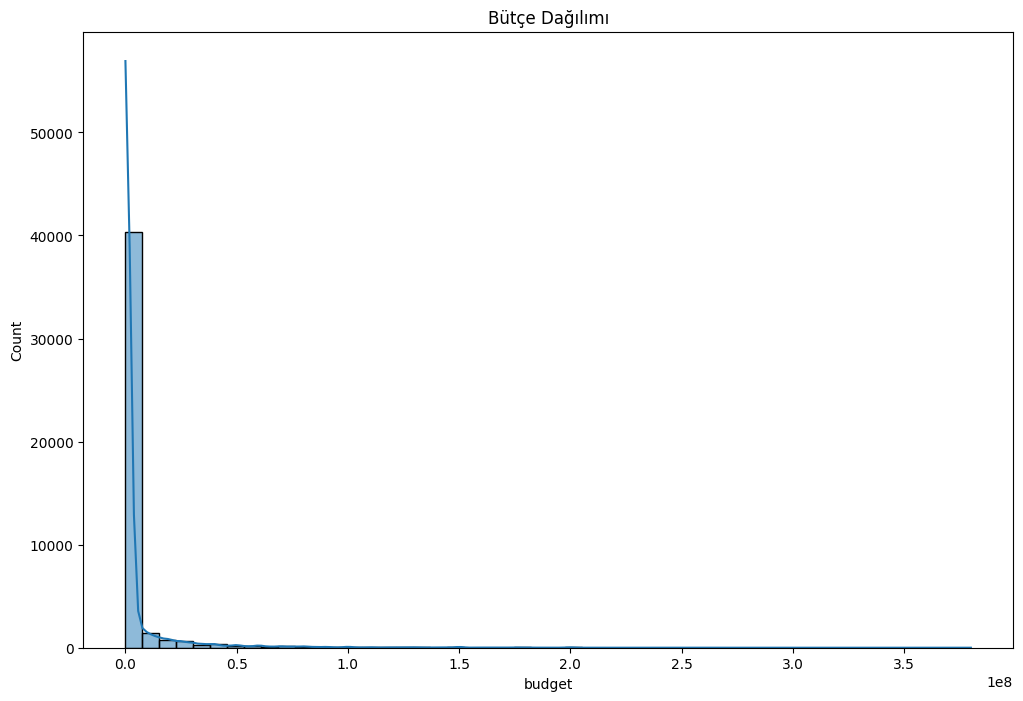

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


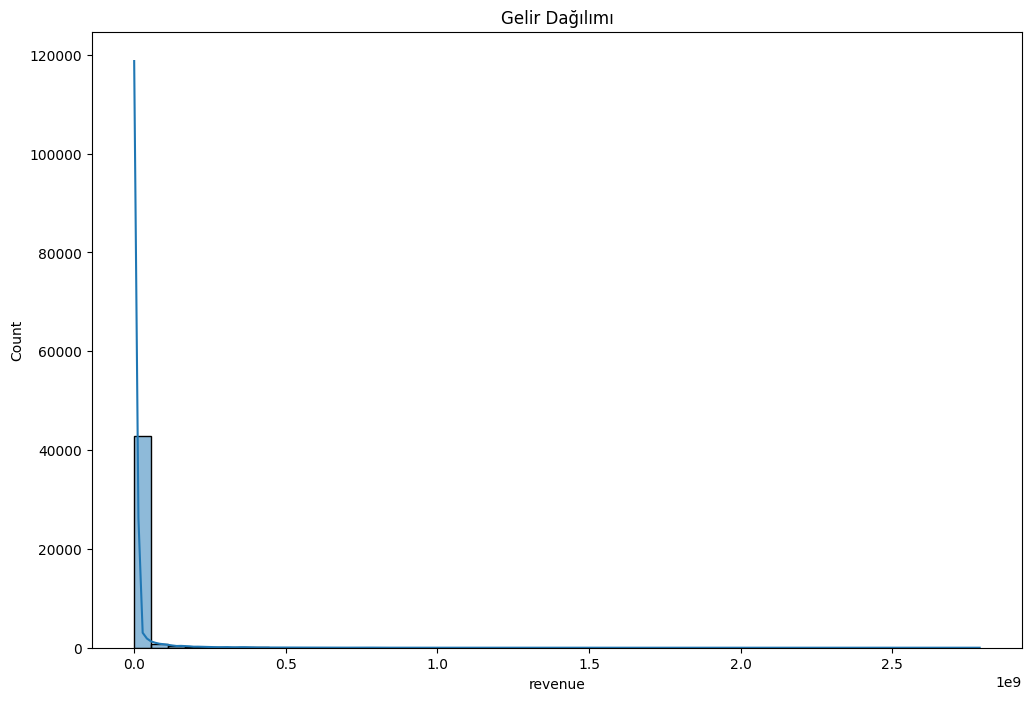

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


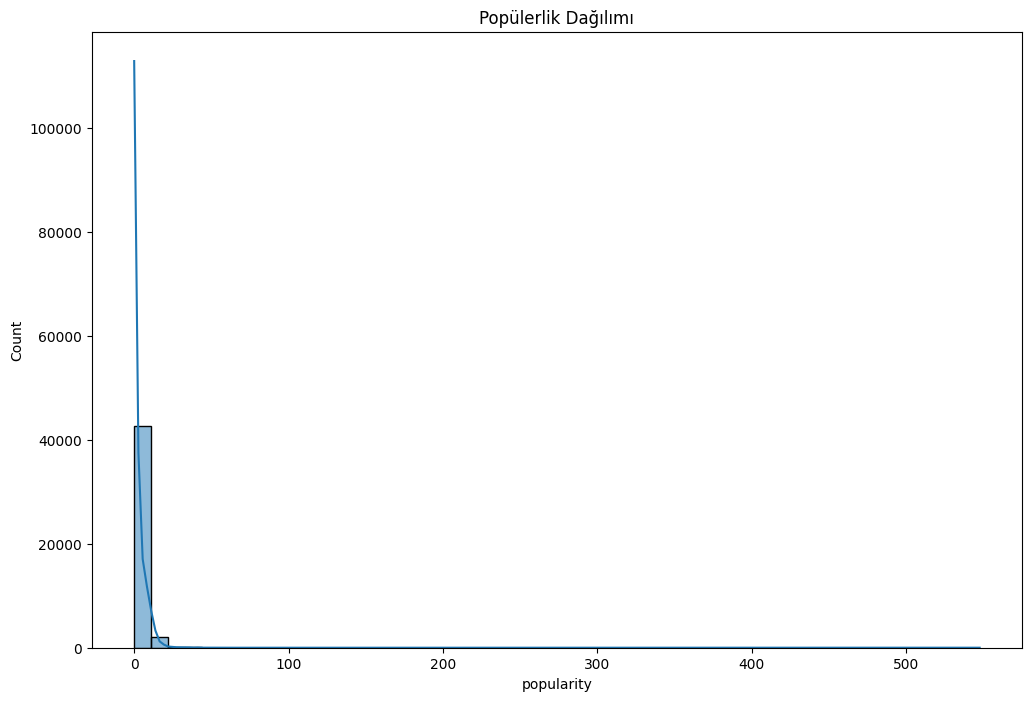

In [7]:
# Bütçe, gelir, ve popülerlik dağılımlarını inceleme
plt.figure(figsize=(12, 8))
sns.histplot(df['budget'], bins=50, kde=True)
plt.title('Bütçe Dağılımı')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title('Gelir Dağılımı')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['popularity'], bins=50, kde=True)
plt.title('Popülerlik Dağılımı')
plt.show()


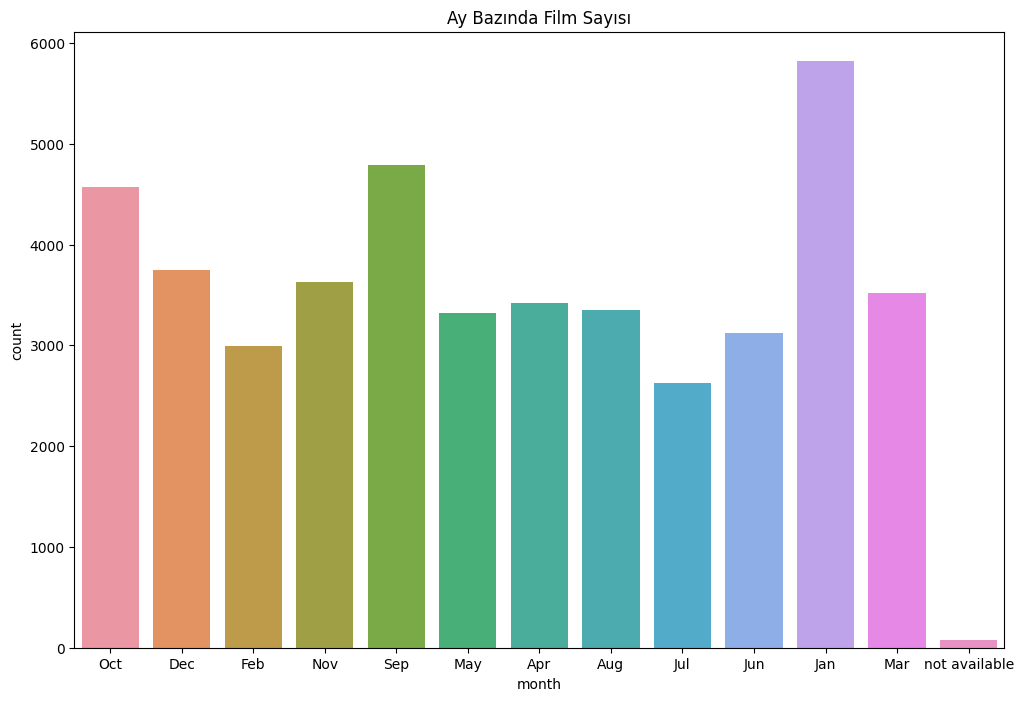

In [8]:
# Aylık film sayısını inceleme
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=df)
plt.title('Ay Bazında Film Sayısı')
plt.show()



In [9]:
 
yearly_counts = df['year'].value_counts().sort_index()

# Yıl bazında film sayısını hesaplama
yearly_counts = df['year'].value_counts().sort_index()

# Yıl bazında film sayısını bir DataFrame'e dönüştürme
yearly_counts_df = yearly_counts.reset_index()
yearly_counts_df.columns = ['Year', 'Film Count']

# Sonuçları görüntüleme
print(yearly_counts_df)

     Year  Film Count
0       0          78
1    1874           1
2    1878           1
3    1883           1
4    1887           1
..    ...         ...
129  2013        1879
130  2014        1961
131  2015        1873
132  2016        1574
133  2017         505

[134 rows x 2 columns]


In [10]:
genre_totals = df.groupby('genre')['popularity'].sum().reset_index()

# En çok tercih edilen ilk 10 kategoriyi seçme
top_10_genres = genre_totals.nlargest(10, 'popularity')

# Grafiği oluşturma
fig = px.bar(
    top_10_genres,
    x='popularity',
    y='genre',
    orientation='h',
    title='En Çok Tercih Edilen İlk 10 Film Türü',
    labels={'popularity': 'Toplam Popülerlik', 'genre': 'Film Türü'},
    color='popularity',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Grafik gösterimi
fig.show()

In [11]:
# En çok izlenen 10 filmi seçme
top_10_movies = df.nlargest(10, 'popularity')

# Grafiği oluşturma
fig = px.bar(
    top_10_movies,
    x='popularity',
    y='title',
    orientation='h',
    title='En Çok İzlenen İlk 10 Film',
    labels={'popularity': 'Popülerlik', 'title': 'Film Başlığı'},
    color='popularity',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Grafik gösterimi
fig.show()

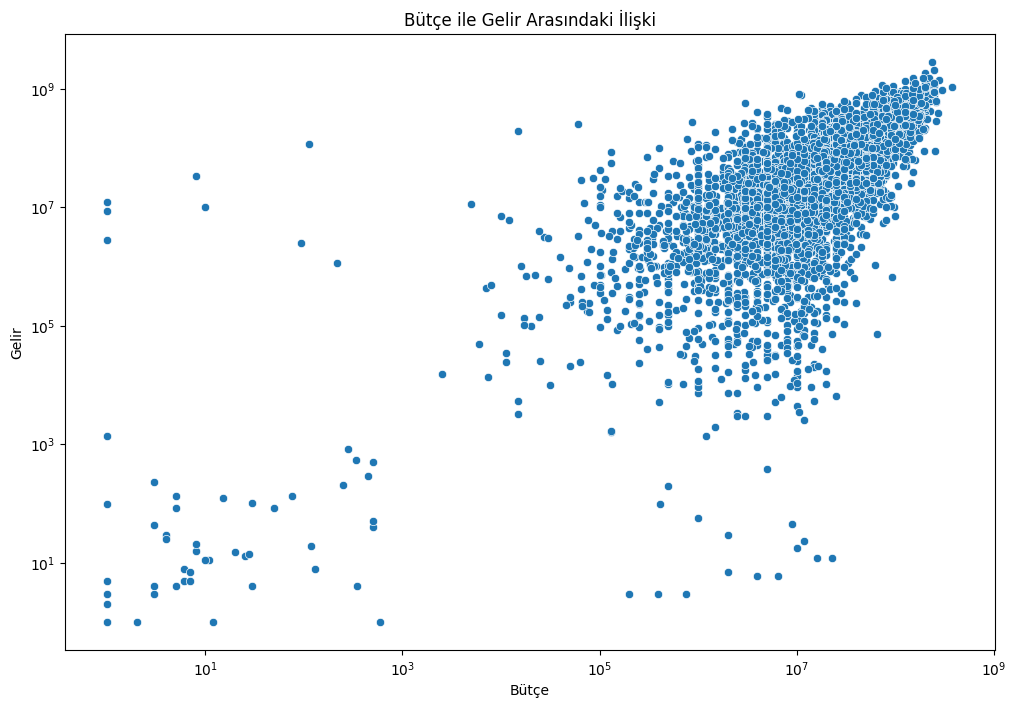

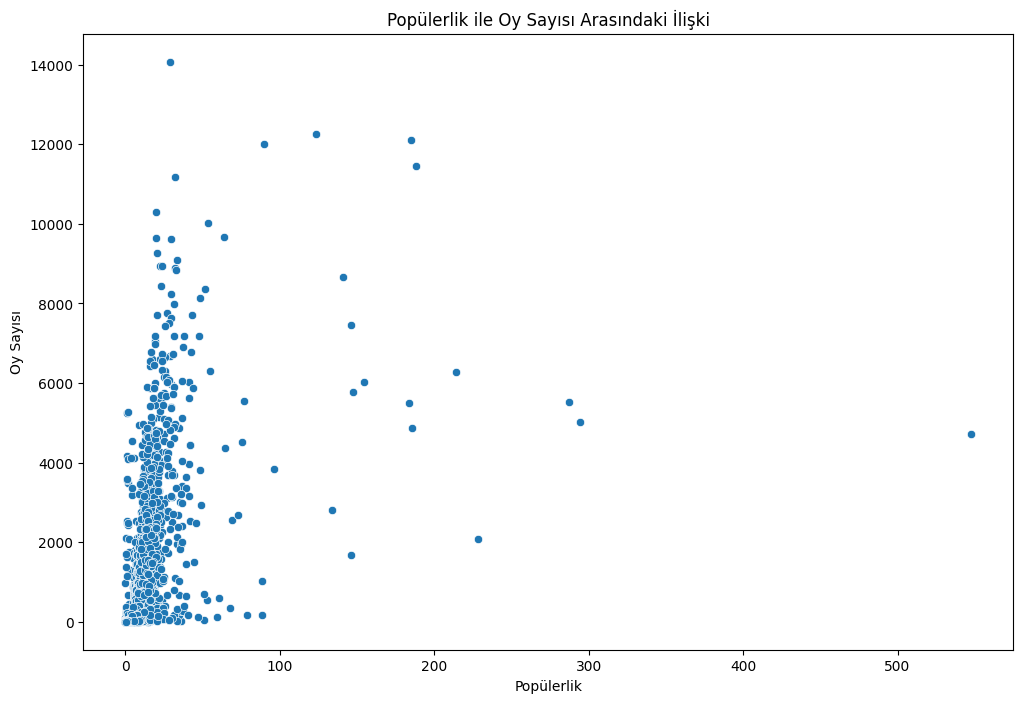

In [12]:
# Bütçe ile gelir arasındaki ilişki
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Bütçe ile Gelir Arasındaki İlişki')
plt.xlabel('Bütçe')
plt.ylabel('Gelir')
plt.xscale('log')  # Bütçe ve gelir genellikle büyük aralıklara sahiptir, log ölçeği kullanmak daha iyi olabilir
plt.yscale('log')
plt.show()

# Popülerlik ile oy sayısı arasındaki ilişki
plt.figure(figsize=(12, 8))
sns.scatterplot(x='popularity', y='vote_count', data=df)
plt.title('Popülerlik ile Oy Sayısı Arasındaki İlişki')
plt.xlabel('Popülerlik')
plt.ylabel('Oy Sayısı')
plt.show()


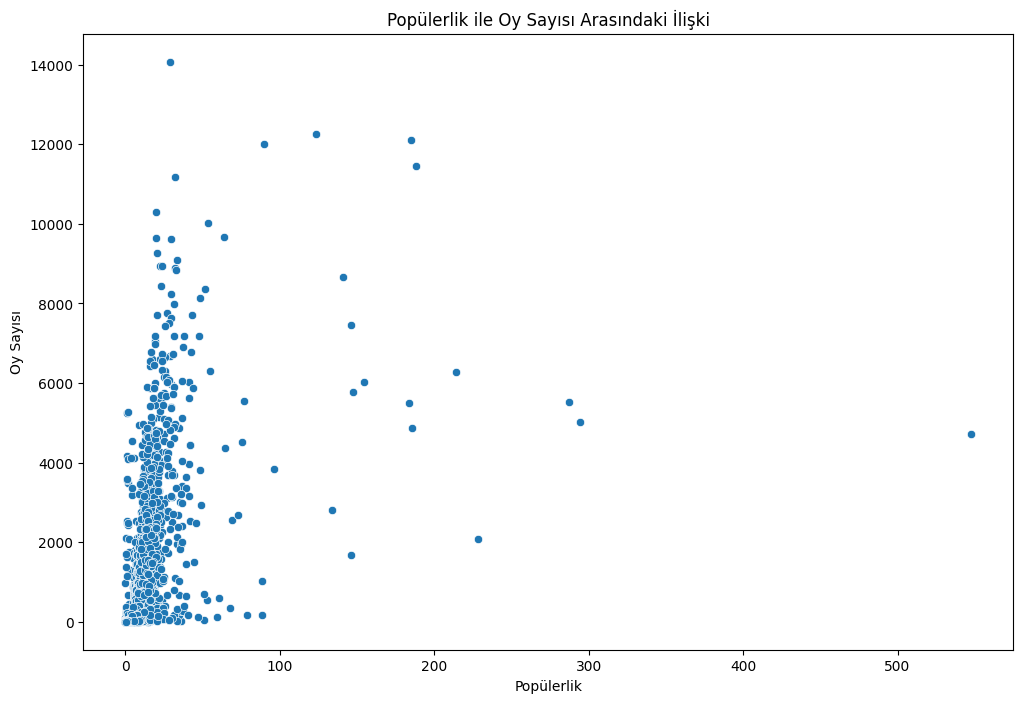

In [13]:
# Popülerlik ile oy sayısı arasındaki ilişki
plt.figure(figsize=(12, 8))
sns.scatterplot(x='popularity', y='vote_count', data=df)
plt.title('Popülerlik ile Oy Sayısı Arasındaki İlişki')
plt.xlabel('Popülerlik')
plt.ylabel('Oy Sayısı')
plt.show()



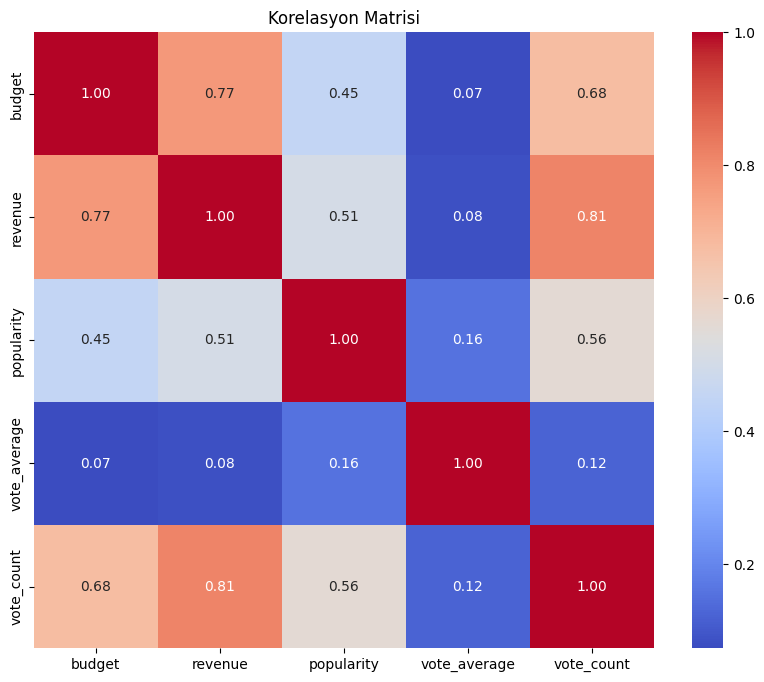

In [14]:
# Korelasyon matrisini hesaplama
corr_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44985 entries, 0 to 44984
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  44985 non-null  bool   
 1   belongs_to_collection  44985 non-null  object 
 2   budget                 44985 non-null  int64  
 3   original_language      44985 non-null  object 
 4   original_title         44985 non-null  object 
 5   overview               44985 non-null  object 
 6   popularity             44985 non-null  float64
 7   release_date           44985 non-null  object 
 8   revenue                44985 non-null  float64
 9   runtime                44985 non-null  float64
 10  tagline                44985 non-null  object 
 11  title                  44985 non-null  object 
 12  vote_average           44985 non-null  float64
 13  vote_count             44985 non-null  float64
 14  languages              44985 non-null  object 
 15  da

In [16]:
from sklearn.preprocessing import LabelEncoder

# Kategorik verileri sayısal verilere dönüştürme
label_encoders = {}
for column in ['genre', 'languages']:  # Örnek olarak iki sütun
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [17]:
# Geçersiz tarihlerle başa çıkma
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%Y-%m-%d')

# NaT değerleri içeren satırları kaldırma (isteğe bağlı)
df = df.dropna(subset=['release_date'])

# Tarih sütunlarını ayrıştırma
df.loc[:, 'release_year'] = df['release_date'].dt.year
df.loc[:, 'release_month'] = df['release_date'].dt.month

# Sonuçları görüntüleme
print(df[['release_date', 'release_year', 'release_month']].head())

  release_date  release_year  release_month
0   1995-10-30          1995             10
1   1995-12-15          1995             12
2   1995-12-22          1995             12
3   1995-12-22          1995             12
4   1995-02-10          1995              2


/tmp/ipykernel_17/809379685.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17/809379685.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
cols_to_drop = ['overview', 'tagline', 'title', 'original_title', 'belongs_to_collection', 'has_homepage', 'day_of_week', 'month', 'season']
df_cleaned = df.drop(columns=cols_to_drop)
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)


/tmp/ipykernel_17/2836102896.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44907 entries, 0 to 44984
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              44907 non-null  bool          
 1   budget             44907 non-null  int64         
 2   original_language  44907 non-null  object        
 3   popularity         44907 non-null  float64       
 4   release_date       44907 non-null  datetime64[ns]
 5   revenue            44907 non-null  float64       
 6   runtime            44907 non-null  float64       
 7   vote_average       44907 non-null  float64       
 8   vote_count         44907 non-null  float64       
 9   languages          44907 non-null  int64         
 10  year               44907 non-null  int64         
 11  genre              44907 non-null  int64         
 12  companies          44907 non-null  object        
 13  countries          44907 non-null  object        
 14  release_yea

In [20]:

df.loc[:, 'release_year'] = df['release_date'].dt.year
df.loc[:, 'release_month'] = df['release_date'].dt.month
df.loc[:, 'release_day'] = df['release_date'].dt.day


/tmp/ipykernel_17/974136429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df = df.drop(columns=['release_date'])

In [22]:
# Kategorik verileri sayısal verilere dönüştürme (Label Encoding ile)
label_encoders = {}
categorical_columns = ['original_language', 'languages', 'genre', 'companies', 'countries']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [23]:


# StandardScaler sınıfını oluşturma
scaler = StandardScaler()

# Belirli sütunları seçip standartlaştırma
df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']] = scaler.fit_transform(
    df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']]
)


In [24]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler sınıfını oluşturma
scaler = MinMaxScaler()

# Belirli sütunları seçip Min-Max ölçekleme uygulama
df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']] = scaler.fit_transform(
    df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']]
)


In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Özellikler ve hedef değişken
X = df.drop('revenue', axis=1)  # Özellikler
y = df['revenue']  # Hedef değişken

# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regresyonu için model oluştur
ridge = Ridge()

# Hiperparametre aralığı belirle
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Grid Search ile en iyi alpha değerini bul
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler
best_params = grid_search.best_params_
print(f"En iyi hiperparametreler: {best_params}")

# En iyi modelin performansı
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² skoru: {r2}")


En iyi hiperparametreler: {'alpha': 1}
Mean Squared Error: 0.000112889402135993
R² skoru: 0.7356119471903002


In [26]:


# Verilerinizi yükleyin ve ayrıştırın
X = df.drop('revenue', axis=1)
y = df['revenue']

# Verileri eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regresyon modeli oluşturun ve alpha=1 ile eğitin
model = Ridge(alpha=1)
model.fit(X_train, y_train)

# Test setinde tahmin yapın
y_pred = model.predict(X_test)

# Performans metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdırın
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Özelliklerin önem derecelerini yazdırın (isteğe bağlı)
feature_importances = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Tahmin sonuçlarını veri çerçevesine dönüştürüp yazdırın
results = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue': y_pred
}).reset_index(drop=True)

print("\nTahmin Sonuçları:")
print(results.head())


Mean Squared Error: 0.000112889402135993
R² Score: 0.7356119471903002

Feature Importances:
vote_count           3.427486e-01
budget               2.041043e-01
popularity           9.352957e-02
adult                6.771230e-04
original_language    2.033218e-05
languages            6.388666e-07
countries            3.372589e-07
companies            5.783718e-08
genre                1.913955e-08
release_month       -3.510528e-06
release_day         -8.835548e-06
release_year        -1.206751e-05
year                -1.206751e-05
vote_average        -1.366348e-03
runtime             -5.383161e-03
dtype: float64

Tahmin Sonuçları:
   Actual Revenue  Predicted Revenue
0             0.0          -0.001035
1             0.0          -0.002080
2             0.0          -0.000123
3             0.0          -0.002568
4             0.0          -0.002247


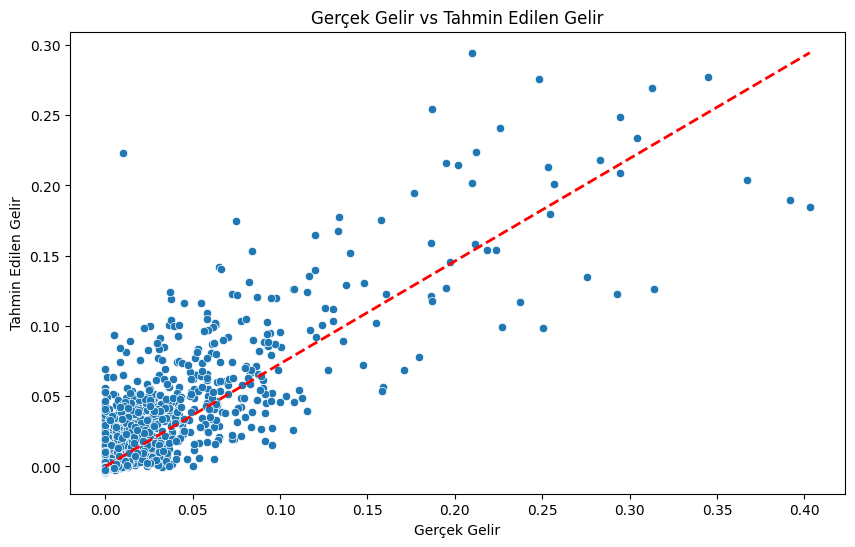

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tahmin sonuçlarını ve gerçek değerleri içeren bir veri çerçevesi oluşturma
results = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue': y_pred
}).reset_index(drop=True)

# Dağılım grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Revenue', y='Predicted Revenue', data=results)
plt.plot([0, max(results['Actual Revenue'])], [0, max(results['Predicted Revenue'])], 'r--', linewidth=2)  # 1:1 referans çizgisi
plt.xlabel('Gerçek Gelir')
plt.ylabel('Tahmin Edilen Gelir')
plt.title('Gerçek Gelir vs Tahmin Edilen Gelir')
plt.show()


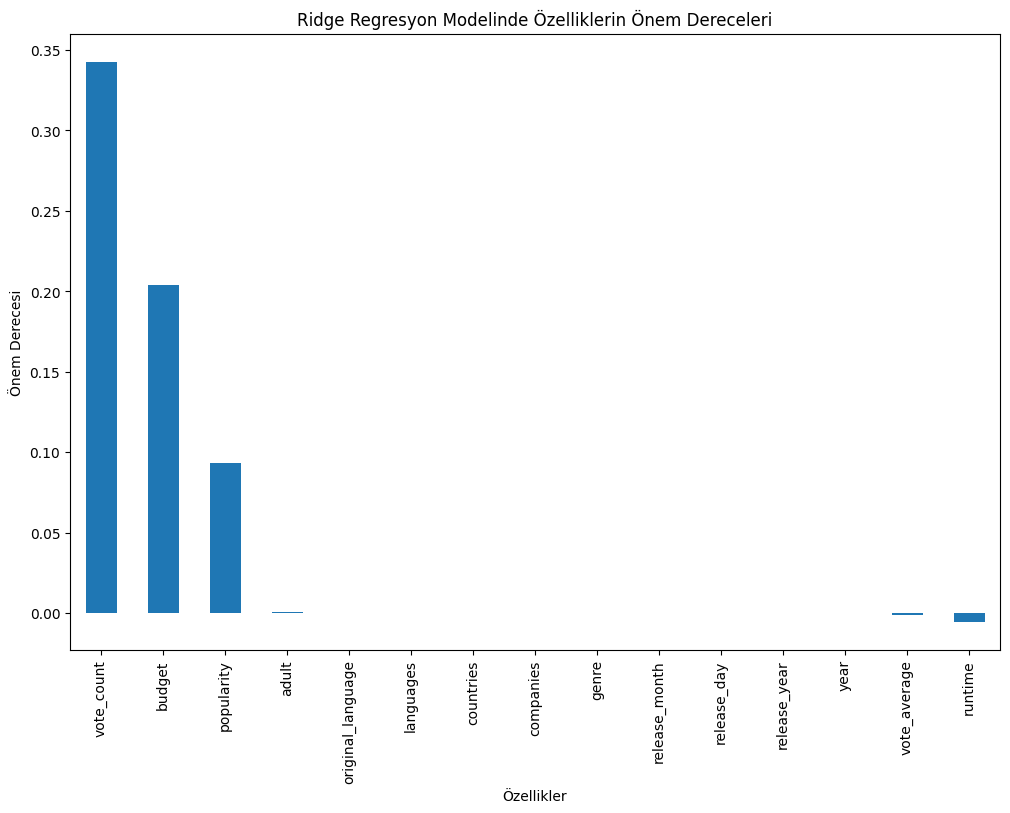

In [28]:
# Özelliklerin önem derecelerini görselleştirme
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.xlabel('Özellikler')
plt.ylabel('Önem Derecesi')
plt.title('Ridge Regresyon Modelinde Özelliklerin Önem Dereceleri')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



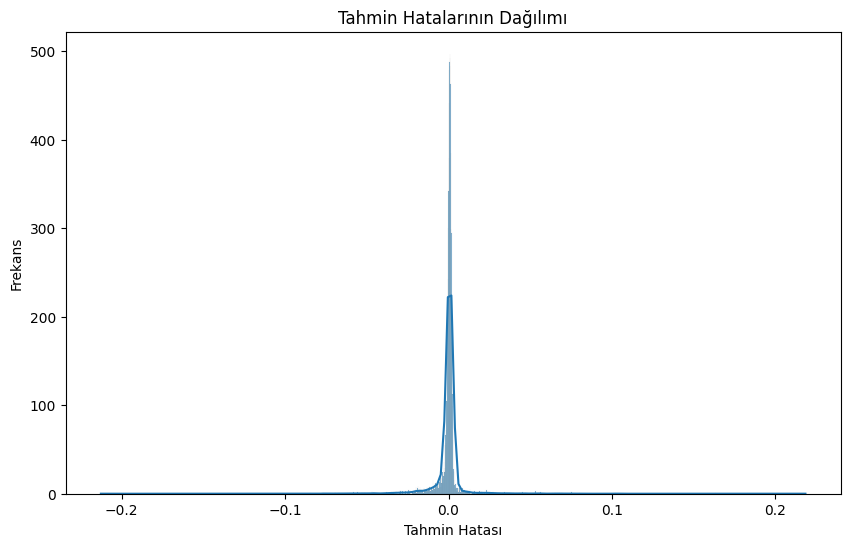

In [29]:
# Hata grafiği oluşturma
plt.figure(figsize=(10, 6))
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.xlabel('Tahmin Hatası')
plt.ylabel('Frekans')
plt.title('Tahmin Hatalarının Dağılımı')
plt.show()


******Unsupervised Learning******

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Her Küme İçin Ortalama Revenue Değerleri:
 cluster
0    0.021811
1    0.000466
2    0.151179
3    0.000024
4    0.298098
Name: revenue, dtype: float64


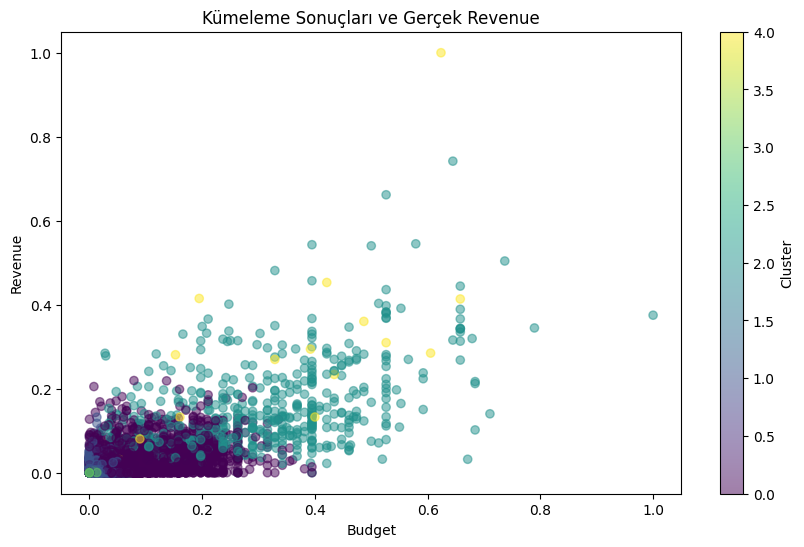


Tahmini Revenue ve Gerçek Revenue Değerleri:
     revenue  predicted_revenue
0  0.133988           0.151179
1  0.094261           0.151179
2  0.000000           0.000466
3  0.029216           0.000466
4  0.027468           0.000466


In [30]:
from sklearn.cluster import KMeans
df = df.dropna()  # Eksik değerler olan satırları düşürme (gerekirse daha uygun bir strateji kullanın)

# Özelliklerin ölçeklendirilmesi
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means modelini oluşturma ve eğitme
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Küme etiketlerini veri çerçevesine ekleyin
df['cluster'] = kmeans.labels_

# Her kümenin ortalama revenue değerlerini hesaplayın
revenue_by_cluster = df.groupby('cluster')['revenue'].mean()
print("Her Küme İçin Ortalama Revenue Değerleri:\n", revenue_by_cluster)

# Verilerdeki tahmini revenue değerlerini küme ortalamalarına göre atayın
df['predicted_revenue'] = df['cluster'].map(revenue_by_cluster)

# Sonuçları görselleştirme (isteğe bağlı)
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Kümeleme Sonuçları ve Gerçek Revenue')
plt.show()

# Sonuçları inceleyin
print("\nTahmini Revenue ve Gerçek Revenue Değerleri:\n", df[['revenue', 'predicted_revenue']].head())
